# Sorting Analysis

Consider a finite collection of orderable elements. Re-arranging that collection so that, the collection is completely ordered, is called sorting. There are many techiniques to sort a collection. Following is some of the comparision based Sorting Algorithms.

- Bubble Sort
- Insertion Sort
- Selection Sort
- Merge Sort
- Quick Sort
- Heap Sort

Before looking at the analysis part, we shall examine the Language in built methods to sorting

## `sorted(collection,reverse = False[,key])`

This function takes an iterable as argument, and returns it in sorted form based on `key`. If key is not given, sorting is done according to default comparision rules. Let's see the examples and understand the working of `sorted()`. If `reverse` is `True`, reversed collection is returned after sorting

In [1]:
x = list(range(10))
import random
random.shuffle(x)

In [2]:
x

[8, 9, 6, 4, 2, 7, 0, 5, 1, 3]

In [3]:
sorted(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
import math
y  = sorted(x,key = lambda x: math.sin(x))  # Sort x in the
y

[5, 4, 6, 0, 3, 9, 7, 1, 2, 8]

In [5]:
[math.sin(i) for i in y]

[-0.9589242746631385,
 -0.7568024953079282,
 -0.27941549819892586,
 0.0,
 0.1411200080598672,
 0.4121184852417566,
 0.6569865987187891,
 0.8414709848078965,
 0.9092974268256817,
 0.9893582466233818]

Note how the elements of `sin(y)` are in increasing order

## Standard `import` statement

In [1]:
from openanalysis.sorting import SortingAlgorithm,SortVisualizer
import numpy as np   # for doing vstack()

`SortingAlgorithm` is the base class providing the standards to implement sorting algorithms, `SortVisualizer` visualizes and analyses the algorithm

## `SortingAlgorithm` class

Any sorting algorithm, which has to be implemented, has to be derived from this class. Now we shall see data members and member functions of this class.

### Data Members

- `name` -  Name of the Sorting Algorithm
- `count` - Holds the number of basic operations performed
- `hist_arr` - A 2D `numpy` array, holding the instances of array, as exchange is performed

### Member Functions

- `__init__(self, name):` - Initializes algorithm with a `name`
- `sort(self, array, visualization):` _ The base sorting function. Sets `count` to 0. `array` is 1D `numpy` array, `visualization` is a `bool` indicating whether `array` has to be `vstack`ed into `hist_arr`

## An example .... Bubble Sort

Now we shall implement the class `BubbleSort`

In [2]:
class BubbleSort(SortingAlgorithm):                        # Derived from SortingAlgorithm
    def __init__(self):
        SortingAlgorithm.__init__(self, "Bubble Sort")     # Initializing with name

    def sort(self, array, visualization=False):            # MUST have this signature
        SortingAlgorithm.sort(self, array, visualization)  # sets self.count to 0
        for i in range(0, array.size):                     # Not len(array)
            exch = False
            for j in range(0, array.size - i - 1):
                self.count += 1                            # Increment self.count after each basic operation
                if array[j] > array[j + 1]:
                    array[j], array[j + 1] = array[j + 1], array[j]
                    exch = True
                if visualization:
                    self.hist_array = np.vstack([self.hist_array, array]) # Save the current state to hist_arr
            if not exch:
                break
        if visualization:
            self.hist_array = np.vstack([self.hist_array, array])  # Save the final state to hist_arr

## `SortVisualizer` class

This class provides the visualization and analysis methods. Let's see its methods in detail

- `__init__(self, sorter):` Initializes visualizer with a Sorting Algorithm. 
    - `sorter` is a class, which is derived from `SortingAlgorithm`
    
    
- `visualize(self, num=100, save=False):` Visualizes the given algorithm with a randomly shuffeled array.
    - `num` size of randomly shuffeled array
    - `save` is `True` means animation is saved in `output/`
    
    
- `efficiency(self, maxpts=1000):`
    - Plots the running time of sorting algorithm by sorting for 3 cases
    - Already Sorted array, reverse sorted array and Shuffled array
    - Analysis is done  by inputting randomly shuffled integer arrays with size staring
      from 100, and varying upto `maxpts` in the steps of 100, and counting the number of
      basic operations
    - `maxpts` Upper bound on size of elements chosen for analysing efficiency

In [3]:
bubble_visualizer = SortVisualizer(BubbleSort)

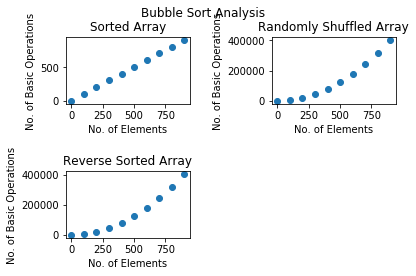

In [4]:
bubble_visualizer.efficiency()

As you can see in the above plot, `BubbleSort` takes $O(n)$ time on best case and $O(n^2)$ time on both avarage and worst cases


You can call to visualize function as this and see the 'mp4' file saved at `output/` folder

```python
    bubble_visualizer.visualize(save=True)
```   


## `compare(algs)`

`algs` is a list of classes derived from `SortingAlgorithm`. It performs tests and plots the bar graph comapring the number of basic operations performed by each algorithm.


## Why a `class` if sorting could be done at a function

We have just seen how `BubbleSort` is implemented. Every sorting algorithm is not as simple as `BubbleSort`. QuickSort and MergeSort needs several auxulary methods to work with. If they are scattered throughout the code, they decrease the readability. So it is better to pack everything in a class.

## Example File

You can see more examples at [Github](https://github.com/OpenWeavers/OpenAlgorithm/blob/master/Python/AnalysisTest/sorting.py)